### For this Midterm exam we will be coding a little 2-D kinematics/projectile motion problem solver. Ours will be a simplified program which doesn't take into account air resistance, centrifugal, or Coriolis forces. We will build the problem in stages but a lot of the points require your first stages to run correctly.
Problems to Hand In: Your log is part of your Midterm exam. In one of the entries, it should identify the start and end of the Midterm and list the problem numbers in order. Keep notes about what you are doing for each problem, as well as the answers to the problems.

In [1]:
import numpy as np

#### Part A. (30 pts) Create a function that considers the case of ZERO acceleration (constant velocity motion) in the $x$-direction and takes in 2 of the 3 kinematic variables: $\Delta x$, $v_x$,  and $t$ and calculates the remaining variable. Make sure to include an informative doc string and to test and account for errors based on the range of possible user inputs. Hint: You will need to use If/Else statements.

In [2]:
def kinematics(x = None, v = None, t=None):
    """Takes in two of three kinematic variables and returns the remaining variable when inputted.
    x is the change in displacement, v is the constant velocity, and t is the time """
    if x == None:
        x = v * t
        return v * t
    elif v == None and t!=0:
        v = x / t
        return v
    elif t == None and v!= 0:
        t = x / v
        return t
    else: 
        error = print("Please provide more information or ensure your values do not equal zero.")
        return error


print(kinematics( v = 12, t = 5)) #Test 1
print(kinematics(x = 32, v = None, t = 4)) #TEst 2
print(kinematics(x = 45, v = 9, t = None)) #Test 3
print(kinematics(x = 30, v = 0, t = None)) #Test 4

60
8.0
5.0
Please provide more information or ensure your values do not equal zero.
None


#### Part B. (20 pts) Create a function, const_accel, that takes in the magnitude of a planet's constant acceleration due to gravity, $g$ and all but 2 of the 4 kinematic variables: $\Delta y$, $v_{0y}$, $v_{fy}$, and $t$. Your function should calculate the 2 kinematic variables which were not given from the quantities that are known. Neglect air resistance. Make sure to include an informative doc string and to test and account for errors based on the range of possible user inputs. You can find a list of the four kinematic equations for constant acceleration in any introductory physics book.###

In [3]:
def const_accel(g, y = None, v0 = None, vf = None, t = None):
    """Takes in two out of four kinematics variables and return the remaining two variables that quantities were unknown."""
    if y == None and v0 == None:
        y = (vf - g*t)
        v0 = (vf-g*t)*t + (g*t**2)/2
        return y, v0
    elif y == None and vf == None:
        y = v0*t - (g*t**2)/2
        vf = v0 - g*t
        return y, vf
    elif y == None and t == None and g != 0:
        y = (vf**2 - v0**2)/(-2*g)
        t = ((vf - v0)/-g)
        return y, t
    elif v0 == None and vf == None and t!= 0:
        v0 = (y - (g*t**2)/2)/t
        vf = (y - ((g*t**2)/2)/t) - g*t
        return v0, vf
    elif v0 == None and t == None and g!= 0:
        v0 = np.sqrt(vf**2 + 2*y*g)
        if ((-v0 +np.sqrt(v0**2 - 2*(-g)*y))/-g) > 0:
            t = ((-v0 + np.sqrt(v0**2 - 2*(-g)*y))/-g)
        else:
            t = ((-v0 -np.sqrt(v0**2 - 2*(-g)*y))/-g)
            return v0, t
    elif vf == None and t == None and g !=0:
        if ((-v0 +np.sqrt(v0**2 - 2*(-g)*y))/-g) > 0:
            t = ((-v0 +np.sqrt(v0**2 - 2*(-g)*y))/-g)
        else:
            t = ((-v0 - np.sqrt(v0**2 - 2*(-g)*y))/-g)
        return (v0 - g*t), t
    else:
        print('Please insert more variables. At least two are necessary and ensure your t and g values are not 0.')

print(const_accel(9.81, delta_y = 12, vfy = 22)) #TEST 1
print(const_accel(9.81, delta_y = 12, t =20)) #TEST 2

(26.822378716288384, 5.884149987932021)
(-97.5, -293.70000000000005)


#### Part C. (10 pts) Write a function, kin_2D which calls one or both of the previous two functions and takes as input the (positive) magnitude of the acceleration due to gravity on a planet's surface, $g$, an initial position vector $\vec{r}_0 = (x_0,y_0)$ in m, a time $t$ in s, and the magnitude and angle (counterclockwise from the horizon or $+x$-axis) of the initial velocity $|\vec{v_0}|$ at angle $\theta$. The function should return the final position vector's $x$ and $y$ components in a 2 element array pos_f and the final velocity vector's x and y components in a 2 element array vel_f. 
Hint you must use trigonometry to break up the velocity vector into $x$ and $y$ components. 

In [4]:
def kin_2D(g, r, t, v0, theta):
    """Calls the kinematics and const_accel functions to pull the x and y position as well as the final velocity for y. Takes the data to produce a final position arry and final velocity array."""
    x = kinematics(x = None, v = v0 * np.cos(theta), t= t)
    y, vf_y = const_accel(g, delta_y = None, v0y = v0 * np.sin(theta), vfy = None, t = t)

    
    x_final = r[0] + x
    y_final = r[1] + y

   
    velocity_x = v0 * np.cos(np.radians(theta))
   
    pos_f = [x_final, y_final]
    vel_f = [velocity_x, vf_y]

    return pos_f, vel_f

print("The final position and final velocity vectors are as follows: ", kin_2D(-9.81, [0,3], 5, 0, 25))

The final position and final velocity vectors are as follows:  ([0.0, 125.625], [0.0, 49.050000000000004])


#### Part D. (10 points) Write a function make_plots, that takes in the same values as the previous problem but now also take in an array, $t$ of 1000 times at 0.2 s intervals. The function should create 4 publication ready, labeled figures:
- Figure 1: The height of the projectile as a function of time $y(t)$. 
- Figure 2: The magnitude of the velocity of the projectile $\vec{v}$ as a function of time. 
- Figure 3: The height ($y$) of the projectile as a function of the $x$-position of the projectile (trajectory).
- Figure 4: The angle $\theta$ in which the projectile is moving in as a function of the projectile's $x$-position. (take the angle to be positive in the counterclockwise direction from the $+x$-axis and use units of degrees). Hint: Using a FOR loop for this is fine.

In [5]:
import matplotlib.pyplot as plt

def make_plots(g, r0, t, v0, theta, intervals):
    """Takes the gravity, initial position vector, time, initial velocity, the angle, and the time intervals to produce the following plots:
    1: The height of a projectile as a function of time.
    2: The magnitude of the velocity of the projectile as a function of time.
    3: The height of the projectile as a function of the trajectory.
    4: The angle in which the projectile is moving as a function of the trajectory"""
    height = []
    velocity = []
    trajectory= []
    angle = []

    for t in intervals:
        
        pos_f, vel_f = kin_2D(g, r0, t, v0, theta)

        # Extract components of position and velocity
        x_final, y_final = pos_f
        velocity_x, velocity_y = vel_f

        # Calculate the magnitude and degrees of angle
        magnitude = np.sqrt(velocity_x**2 + velocity_y**2)
        degree = np.arccos(x_final/np.sqrt(x_final**2 + y_final**2))

        # Appending data
        height.append(y_final)
        velocity.append(magnitude)
        trajectory.append(x_final)
        angle.append(degree)

    # Create the four plots
    plt.figure(figsize=(6, 6))

    # Figure 1: Height as a function of time
    plt.subplot(2, 2, 1)
    plt.plot(intervals, height)
    plt.xlabel('Time (s)')
    plt.ylabel('Height (m)')
    plt.title('Height vs. Time')

    # Figure 2: Magnitude of velocity as a function of time
    plt.subplot(2, 2, 2)
    plt.plot(intervals, velocity)
    plt.xlabel('Time (s)')
    plt.ylabel('Velocity (m/s)')
    plt.title('Velocity vs. Time')

    # Figure 3: Height as a function of the x-position (trajectory)
    plt.subplot(2, 2, 3)
    plt.plot(trajectory, height)
    plt.xlabel('X-Position (m)')
    plt.ylabel('Height (m)')
    plt.title('Height vs. X-Position')

    # Figure 4: Angle as a function of x-position
    plt.subplot(2, 2, 4)
    plt.plot(trajectory, angle)
    plt.xlabel('X-Position (m)')
    plt.ylabel('Angle (degrees)')
    plt.title('Angle vs. X-Position')

    # Adjust subplot layout and display the plots
    plt.tight_layout()
    plt.show()


#### Part E. (10 points) 
1. Call the function and produce figures 1 - 4 for a projectile launched from $x = 0$ m on top of a $5$ m hill on Mars  with an initial velociy of $2$ m/s at $30^\circ$ ABOVE the horizon.
2. Call the function and produce figures 1 - 4 for a projectile launched from $x = 0$ m on top of a $5$ m hill on Earth with an initial velociy of $7$ m/s at $30^\circ$ BELOW the horizon.
3. Call the function and produce figures 1 - 4 for a projectile launched from $x = 3.3$ m on top of a $10$ m hill on the Moon with an initial velociy of $70$ m/s at $10^\circ$ ABOVE the horizon.
4. Create a markdown cell and comment about if your results seem to make sense. ($\sim$ 3 - 4 sentences)

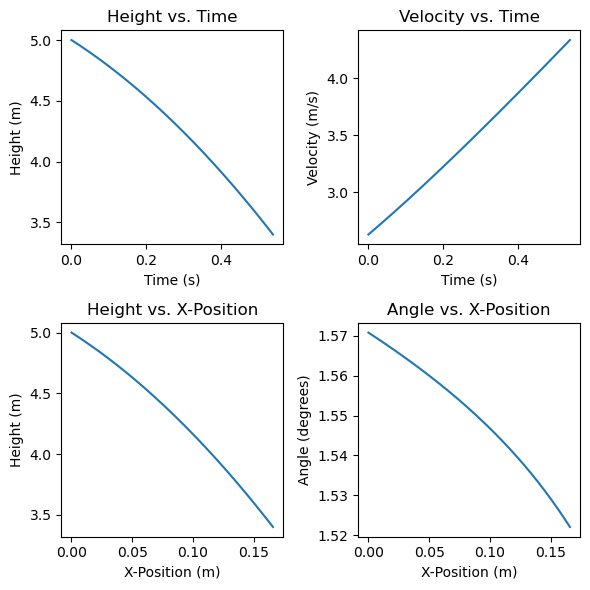

None


In [6]:
# Mars
g_mars = 3.721  # Acceleration due to gravity on Mars
r0_mars = (0, 5)  # Launch from 5 m hill on Mars
v0_mars = 2.0  # Initial velocity on Mars 
theta_mars = 30.0  # Angle ABOVE the horizon on Mars 
mars_intervals = np.linspace(0, 2 * v0_mars * np.sin(np.radians(theta_mars)) / g_mars, 1000)

print(make_plots(g_mars, r0_mars, mars_intervals[-1], v0_mars, theta_mars, mars_intervals))


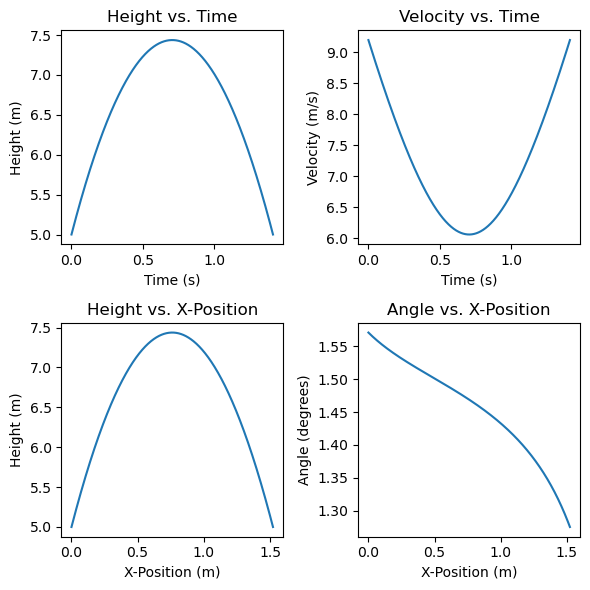

None


In [7]:
# Earth
g_earth = 9.81  # Acceleration due to gravity on Earth 
r0_earth = (0, 5)  # Launch from 5 m hill on Earth
v0_earth = 7.0  # Initial velocity on Earth 
theta_earth =-30
earth_t_i = np.linspace(0, 2 * v0_earth * np.sin(theta_earth) / g_earth, 1000)

print(make_plots(g_earth, r0_earth, earth_t_i[-1], v0_earth, theta_earth, earth_t_i))

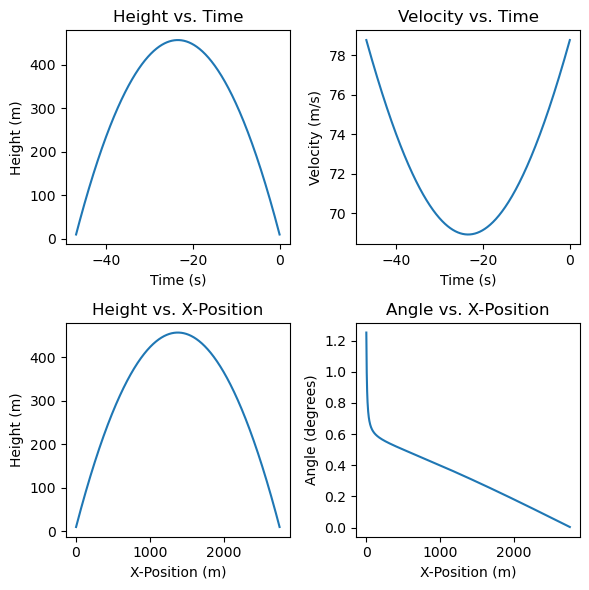

None


In [8]:
#Moon
g_moon = 1.625  # Acceleration due to gravity on the Moon (m/s^2)
r0_moon = (3.3, 10)  # Launch from 10 m hill on the Moon
v0_moon = 70.0  # Initial velocity on the Moon (m/s)
theta_moon = 10.0  # Angle above the horizon on the Moon (degrees)
moon_t_i = np.linspace(0, 2 * v0_moon * np.sin((theta_moon)) / g_moon, 1000)

print(make_plots(g_moon, r0_moon, moon_t_i[-1], v0_moon, theta_moon, moon_t_i))

The results make sense to me since the Moon has a much different environment gravity wise and shooting a projectile via the moon is already going to be drastically different than Earth. What was interesting to me was how Mars did not result in a parabola whereas Earth and the moon did. Instead, Mars' projectile simply does not get air time and falls immediately.

#### Part F. (5 points) Make a plot of the total energy (Kinetic + Potential) of the projectile as a function of time for 1-3 in part E. Assume that the mass is 1 kg. Kinetic Energy is $\frac{1}{2}mv^2$ and potential energy is $mgy$. The three curves should be in one figure using different colors and labeled with a legend showing the planet they took place on.

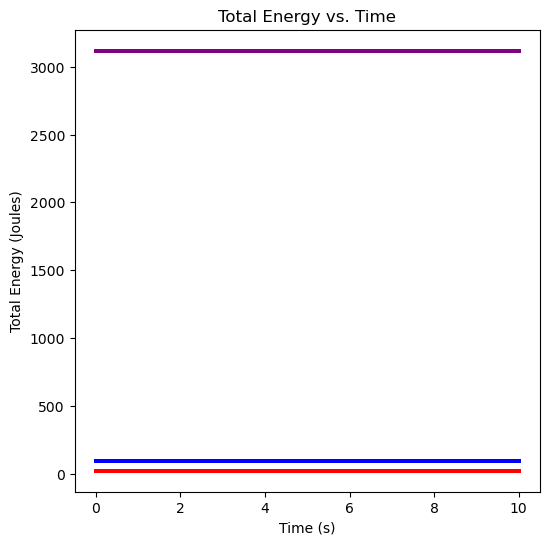

In [9]:
def energy(g, r0, t, v0, theta, m):
    """Takes in the gravity, initial position vector, time, intital velocity, the angle and mass in order to calculate the kinetic and potential energy of the projectile and return the total energy"""

    total = []

    for i in t:
        pos, vel = kin_2D(g, r0, t, v0, theta)
        y = pos[1]
        v = np.sqrt(vel[0]**2 + vel[1]**2)
        pe = m * g * y
        ke = 0.5 * m * v**2
        total.append(pe + ke)

    return total


t = np.linspace(0 , 10, 1000)
energy_earth = energy(g_earth, r0_earth, t, v0_earth, theta_earth, 1)
energy_mars = energy(g_mars, r0_mars, t, v0_mars, theta_mars, 1)
energy_moon = energy(g_moon, r0_moon, t, v0_moon, theta_moon, 1)


# Plot the total energy as a function of time
plt.figure(figsize=(6, 6))
plt.plot(t, energy_earth, label='Earth', color='blue')
plt.plot(t, energy_mars, label='Mars', color='red')
plt.plot(t, energy_moon, label='Moon', color='purple')

plt.xlabel('Time (s)')
plt.ylabel('Total Energy (Joules)')
plt.title('Total Energy vs. Time')
#plt.legend()
#plt.grid(True)
plt.show()

#### Part G. (5 points) Make a "wrapper" function, my_wrapper, that asks the user for the following input: 
- The planet on which the motion is taking place, i.e. "Earth", "Jupiter", "Mars", "Moon" etc. Your function should be able to "look up" $g$ for the selected planet.
- The initial position vector $\vec{r}_0 = (x_0,y_0)$ in m. (Make sure that $y_0$ is a positive number (the projectile should start above ground level.)
- The magnitude and angle (counterclockwise from the horizon or $+x$-axis) of the initial velocity $|\vec{v_0}|$ at angle $\theta$.

#### The wrapper function should call your functions from previous parts to tell the user how long it will take for the projectile to hit the ground and what its speed will be on impact.
#### The wrapper function should also create all of the plots in from part D.

Enter the name of the planet (Earth, Mars, Moon.): Moon
Enter the initial x-position (meters): 0
Enter the initial y-position (above ground, meters): 0
Enter the initial velocity magnitude (m/s): 12
Enter the angle (counterclockwise from the +x-axis, degrees): 45
Time to impact: 12.57 seconds
Impact speed: 12.00 m/s


C:\Users\hltra\AppData\Local\Temp\ipykernel_18092\3468970504.py:20: RuntimeWarning: invalid value encountered in scalar divide
  degree = np.arccos(x_final/np.sqrt(x_final**2 + y_final**2))


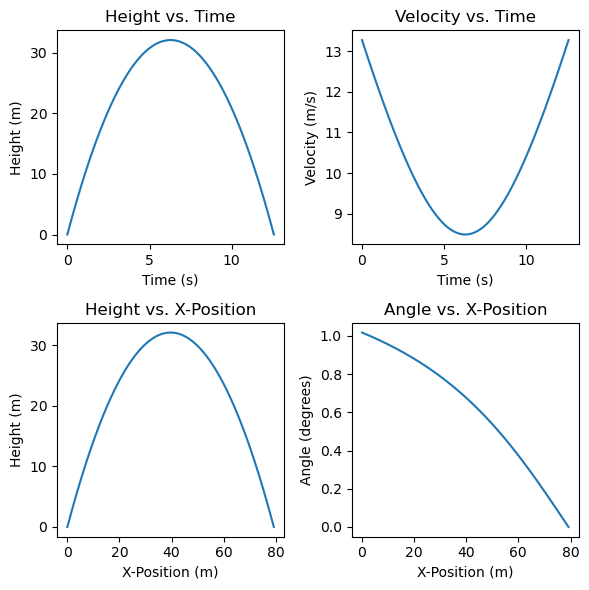

In [10]:
def my_wrapper():
    """Takes input of the planet, x0, y0, v0, and theta. Uses const_accel in order to calculate the final y velocity and time. Calculates the final x velocity. Returns a set of plots from the previous function for any planet the user describes """
    # Input the planet name and look up the corresponding acceleration due to gravity (g)
    planet = input("Enter the name of the planet (Earth, Mars, Moon.): ").strip().lower()
    if planet == "earth":
        g = 9.81  # Acceleration due to gravity on Earth (m/s^2)
    # Add more planets and their respective values here.
    elif planet == "mars":
    
        g = 3.721  # Default to Earth's gravity
    elif planet == "moon":
        g = 1.625
    else:
        print("Please enter the planet's gravity: ")
        g = float(input("Enter the gravity: "))


    # Input the initial position vector (r)
    x0 = float(input("Enter the initial x-position (meters): "))
    y0 = float(input("Enter the initial y-position (above ground, meters): "))
    if y0 < 0:
        print("Initial y-position should be a positive number (above ground). Defaulting to 0.")
        y0 = 0

    # Input the initial velocity magnitude and angle
    v0 = float(input("Enter the initial velocity magnitude (m/s): "))
    theta = float(input("Enter the angle (counterclockwise from the +x-axis, degrees): "))

    # Calculate time and final velocity via const_accel
    vf, time = const_accel(g, y0, v0 * np.sin(theta), None, None)
    vf_x = v0 * np.cos(theta)
    impact_speed = np.sqrt(vf**2 + vf_x**2)

    print(f"Time to impact: {time:.2f} seconds")
    print(f"Impact speed: {impact_speed:.2f} m/s")

    # Generate the plots
    time_intervals = np.linspace(0, time, 1000)
    make_plots(g, (x0, y0), time, v0, theta, time_intervals)

# Call the wrapper function
my_wrapper()